In [1]:
# la importacioón de estos magics ayudan a que cuando actualice algún 
# modulo de metvial se actualice así esté ejecutado en el notebook, 
# sin necesidad de volver a importar un paquete

# Para ejecutar este cuadernillo debe estar en la carpeta de metvial.

%load_ext autoreload
%autoreload 2

In [2]:
# Importación de algunas librerías extras que probablemente se necesitaran

from typing import Dict, List, Tuple, Union, Optional
import numpy as np
import pandas as pd
import shapely.geometry as shg
from pathlib import Path
from icecream import ic

In [3]:
# Con el fin de hacer pruebas se agrega un archivo gzip de procesamiento
gzip_path = r"D:\Data\CCT_Drones\P2_50\012345\01SAB_AVENIDA33_CARRERA63B_20221201_1445.gzip"

# En caso tal de que se deba modificar por alguna razón la forma de guardado de este archivo se 
# debe realizar con la versión de pandas instalada en metvial co el comando

# series_metvial.to_pickle(gzip_path2save, compression='gzip')

In [4]:
gzip_file = Path(gzip_path)
series_metvial = pd.read_pickle(gzip_file, compression='gzip')

# series_metvial es una serie que se retorna a medida que se procesa metvial
# Índice 'trajectory':
#     DataFrame de trayectorias. columnas : bbox	category	id	trajectory
# Índice 'fligth_meta': 
#     Diccionario que tiene información sobre el video. llaves: 'pixel_size', 'duration', 'time', 'date', 'period'
# Índice 'geom_bytes':
#     Archivo de la geometria víal en bytes.
# Índice 'img_veh_bytes':
#     Imagen de movimientos vehículares
# Índice 'img_ped_bytes':
#     Imagen de movimientos peatonales
# Índice 'metvial_dict':
#     Diccionario de definiciones MetVial. las llaves son:
#         'network' -> información de la red vial
#         'fligth' -> información del video

In [5]:
# importación del flujo principal de 

# por ejemplo la función vehicular_form_and_report se encarga internamente de ejecutar absolutamente todo lo necesario para 
from metvial.workflow import *

: 

In [ ]:
# la función 'load_data' se encarga de leer una serie metvial.
# retorna --> metvial_dict: diccionario metvial
#             network_geom: geometría víal (compuertas)
#             traj_db:  trayectorias que tienen los campos  bbox	category	id	trajectory

# la función se encuentra en metvial.workflow
data_loaded = load_data(series_metvial)

: 

In [ ]:
metvial_dict, network, trajectories = data_loaded
metvial_dict

: 

In [ ]:
network

: 

In [ ]:
trajectories.head(2)

: 

In [ ]:
network_list = list(network.items())
network_list

: 

In [ ]:
# La función cal_routing_and_volume genera las tablas de ruteo y de volumen, estas funciones se
# encuentran en: 
# :func:`metvial.metrics.volume.volume_movement`,
# :func:`metvial.metrics.routing.routing_network`

# la función se encuentra en metvial.workflow
routing_db, volumen_db = cal_routing_and_volume(data_loaded)

: 

In [ ]:
# la tabla routing consiste en los siguientes campos id	section	t_begin	t_end
# id: identificador de la trayectoría
# section: compuerta x de la trayectoria:
# t_begin: tiempo de entrada en el que se registro la trayectoría en la compuerta x
# t_end: tiempo de salida en el que se registro la trayectoría en la compuerta x

routing_db.head()

: 

In [ ]:
# Tabla de volumen:
# La tabla de volumen contiene las siguientes columnas

# movement: Id del movimiento de estudio
# category: categoría de vehiculo
# intensity: cantidad de vehiculos que realizaron el movimiento según la categoría
# velocity_mean: velocidad promedio de la categoría
# velocity_q85: velocidad en el cuartil 85 
# time_out_mean: tiempo promedio en el que la categoría realizó el movimiento de salida
# time_out_q85: tiempo en el cuartil 85 en el que la categoría realiza el movimiento de salida
# time_out_max: tiempo máximo en el que la categoría realizó el movimiento
# time_out_min: tiempo mínimo en el que la categoría realizó el movimiento
    
volumen_db.head()

: 

In [ ]:
# Importamos librerías para mostrar al imagen almacenada en bytes
import io
from PIL import Image
import matplotlib.pyplot as plt

: 

In [ ]:
# cargar la imagen binaria desde una variable
im = Image.open(io.BytesIO(series_metvial['img_veh_bytes']))
plt.imshow(im)

: 

In [ ]:
# la función se encuentra en metvial.workflow
# función en D:\git_sier\metvial\metvial\workflow.py
graph_traj(routing_db=routing_db, 
           metvial_dict=metvial_dict, 
           network_geom=network, 
           traj_db=trajectories, 
           binary_image=series_metvial['img_veh_bytes'],
          )

: 

In [ ]:
# al ejecutar la función anterior se crean las siguientes imagenes

: 

En esta imagen podemos observar todas las trayectorias, algunas en color blanco y otras en color azul.

En color blanco son todas aquellas detecciones que no generaron un movimiento

En color azul aquellas trayectorías que lograron realizar el movimiento por medio de las dos compuertas

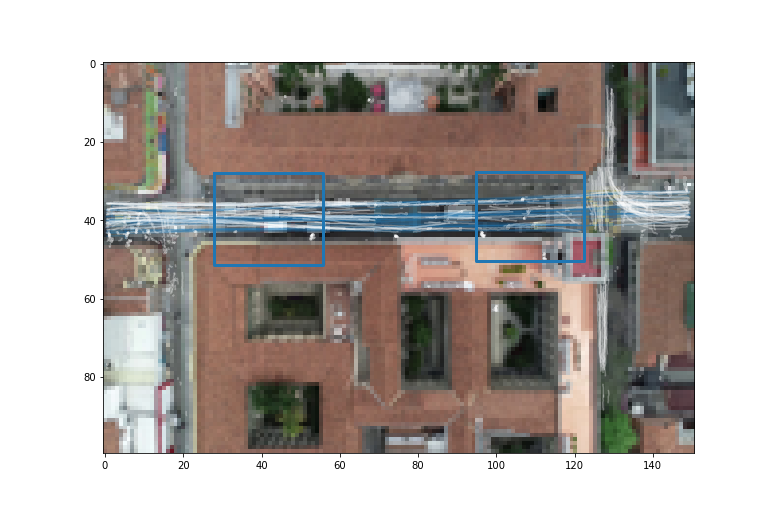

Adicional a la imagen de arriba donde se ven todas las trayectorías se genera una imagen con las trayectorías filtradas

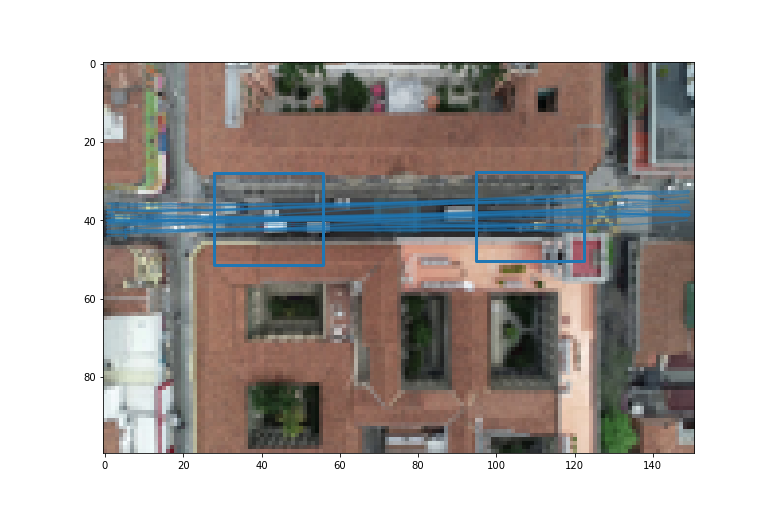

In [ ]:
# guardamos las bases de datos de routing_db y volumen_db contenidas en una tupla en la variable data_bases
data_bases = (routing_db, volumen_db)
path_to_find='' # valor por defecto en la función 

: 

In [ ]:
data_loaded[0]['network']['mov_traffic']

: 

In [ ]:
folder2save, _ = os.path.split(data_loaded[0]['fligth']['SAB']['traj_file'])
folder2save

: 

In [ ]:
# función en D:\git_sier\metvial\metvial\workflow.py
write_report(data_loaded, data_bases)

: 

### ----------------------------------------------------------------------------------------------------------
#### Abrimos un paréntesis para ejecutar las tablas de brechas y tiempos de colisión todo lo que se ejecuta internamente en write_report

In [ ]:
mov = '3_0'
moves = data_loaded[0]['network']['mov_traffic']


# D:\git_sier\metvial\metvial\safety\gap_time.py
# get_gap_time: Obtiene el DataFrame de tiempo de brecha.
gap_data = gap_time.get_gap_time(routing_db, trajectories, network, moves[mov][0])
gap_data

: 

In [ ]:
# Obtiene estadisticas del tiempo de brecha.
# D:\git_sier\metvial\metvial\safety\gap_time.py
gap_time.gap_time_statistic(gap_data, folder2save, mov)

: 

In [ ]:
# documentación de la función :
# D:\git_sier\metvial\metvial\safety\collision_time.py
""" Se clacula el tiempo para colisión el cual es el tiempo que tomaría
    para que dos vehículos colisionaran sí las velocidades de ambos
    vehículos no se altera desde el momento en que el vehículo de
    adelante pasa por un punto de referencia."""
coll_data = collision_time.get_collision_time(routing_db, trajectories, network, moves[mov][0])
coll_data

: 

In [ ]:
# documentación de la función :
# D:\git_sier\metvial\metvial\safety\collision_time.py
""" Dado un DataFrame de tiempo para colisión, se
    obtiene el tiempo para colisión en el percentil 85 y la media, además
    se obtiene el histograma para el DataFrame y los histogramas
    de todas las categorías agrupadas guardandolos en una carpeta llamada 
    collision_imgs."""
collision_time.collision_time_statistic(coll_data, folder2save, mov)

: 

In [ ]:
# documentación de la función :
# D:\git_sier\metvial\metvial\safety\collision_time.py
"""Obtiene estadisticas de la separación entre vehículos.

    Dado un DataFrame de tiempo para colisión, se
    obtiene la distancia entre los vehículos en el percentil 85 y la media,
    además se obtiene el histograma para el DataFrame y los histogramas
    de todas las categorías agrupadas guardandolos en una carpeta llamada 
    distance_imgs."""
collision_time.distance_statistic(coll_data, folder2save, mov)

: 

In [ ]:
# Genera los gráficos intensidad de vehículos por acceso.
volume.graph_acces(routing_db, trajectories, moves, folder2save)

: 

In [ ]:
#Evaluación del indice de fatalidad.
safety = fatality.fatality(volumen_db)
safety

: 

### ----------------------------------------------------------------------------------------------------------
fin paréntesis

**Nota: **
    
    El script D:\git_sier\metvial\metvial\report\volume_report.py 
    actualmente funciona con unas variales quemadas en l linea 64-69 

    car = 'Car'
    motor = 'motorcycle'
    bus = 'bus'
    truck = 'truck'
    person = 'person'
    bicycle = 'bicycle'
    
    ya que con las actualizaciones que se han hecho ya las categorías se cargan desde
    
    **metvial\metvial\data\categories.name**

In [ ]:
# función en D:\git_sier\metvial\metvial\workflow.py
write_vehicular_form(data_loaded, data_bases)

: 

: 